# 과제1: tensorflow를 이용한 NN 밑바닥부터 구현
input feature가 100개이고,  
hidden layer가 2개이고 neuron이 각각 50,10개이고,  
output이 5개인 NN를 구현해 보자  
* hidden layer는 relu를 activation function으로, output layer는 softmax를 activation function으로 사용

In [134]:
import tensorflow as tf
import numpy as np

In [135]:
n_x = 100
n_h1 = 50
n_h2 = 10
n_y = 5

In [136]:
# Simulate train set
m = 500

x_train=np.random.randn(m,n_x).astype(np.float32)
y_train=np.zeros((m,n_y)).astype(np.float32)
y_train[np.arange(m),np.random.randint(n_y,size=m)]=1

print(x_train)
print(y_train)


[[-0.14894207  0.70819837 -1.0280124  ... -0.58008444 -0.66378003
   1.4455067 ]
 [ 0.26702562  1.8195413  -0.4902526  ... -0.4775329   0.57383436
   0.16611022]
 [-0.26046693 -0.1963133   0.7075181  ...  0.7984418  -0.2333922
   2.0305521 ]
 ...
 [ 1.02368     0.13778742  1.0478146  ... -0.6469656   0.9798138
   0.34179986]
 [ 1.0370979   0.09489009  2.1430323  ... -0.35429305 -0.67017996
   0.826669  ]
 [-0.17257391  0.00557853  0.8481253  ...  0.6333207   0.8689979
  -0.78844786]]
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


* Initialization of weights

In [137]:
w1=tf.Variable(1e-3*np.random.randn(n_x,n_h1).astype(np.float32),name="w1")
## 코드를 작성해 보세요 ##
w2=tf.Variable(1e-3*np.random.randn(n_h1,n_h2).astype(np.float32),name="w2")
w3=tf.Variable(1e-3*np.random.randn(n_h2,n_y).astype(np.float32),name="w3")


* forward propagation을 통해 prediction 값을 구하고, loss를 구하는 function을 만들어 봅시다

In [138]:
def forward(x):
    z1=tf.matmul(x,w1)
    a1=tf.nn.relu(z1)
    ## 코드를 작성해 보세요 ##
    z2=tf.matmul(a1,w2)
    a2=tf.nn.relu(z2)
    z3=tf.matmul(a2,w3)
    predictions = tf.nn.softmax(z3)
    
    return predictions

def loss_fn(predictions, y):
    loss= -tf.reduce_sum(y*tf.math.log(predictions))
    return loss    

* backpropagation & update parameters

In [139]:
learning_rate=1e-2
optimizer=tf.keras.optimizers.Adam(learning_rate)

def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = forward(x)
        loss = loss_fn(predictions, y)
    
    ## 코드를 작성해 보세요 ## (hint: tape.gradient를 구글링 해보세요)
    gradient = tape.gradient(loss, [w1, w2])
    # optimizer와 위에서 구한 경사도를 이용해 가중치들을 업데이트 합니다.
    optimizer.apply_gradients(zip(gradient, [w1, w2]))
    
    return loss, w1, w2


* 간단하게 train loop를 작성해 loss가 줄어나가는지 확인해 봅시다.

In [140]:
loss_list = []

for step in range(10): 
    train_step(x_train, y_train)
    loss, w1, w2 = train_step(x_train, y_train)
    loss_list.append(loss.numpy())
    
print(loss_list)

[804.7173, 804.6793, 804.5732, 804.3762, 804.07166, 803.6448, 803.0827, 802.3719, 801.501, 800.45557]


# 과제2: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [141]:
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [142]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [143]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

TypeError: Invalid shape (784,) for image data

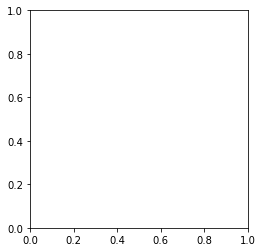

In [144]:
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [ ]:
y_train.shape

In [ ]:
# show MNIST label for above data
y_train[0]

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [145]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [146]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
input_=keras.layers.Input(shape=x_train.shape[1])
layer1=keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal")(input_)
layer2=keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal")(layer1)
output_=keras.layers.Dense(10, activation="softmax")(layer2)
model=keras.Model(inputs=[input_], outputs=[output_])

내가 만든 모델을 확인해 봅시다.

In [147]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

model을 자유롭게 train 해봅시다.  

In [149]:
history=model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9882 - accuracy: 0.7269 - val_loss: 0.3056 - val_accuracy: 0.9122
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.9138 - val_loss: 0.2429 - val_accuracy: 0.9316
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2405 - accuracy: 0.9313 - val_loss: 0.2133 - val_accuracy: 0.9403
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2045 - accuracy: 0.9419 - val_loss: 0.1859 - val_accuracy: 0.9491
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1786 - accuracy: 0.9489 - val_loss: 0.1716 - val_accuracy: 0.9522
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1596 - accuracy: 0.9531 - val_loss: 0.1609 - val_accuracy: 0.9551
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1433 - accuracy: 0.9587 - val_loss: 0.1459 - val_accuracy:

95%이상의 성능을 가진 모델을 만들면 완성!

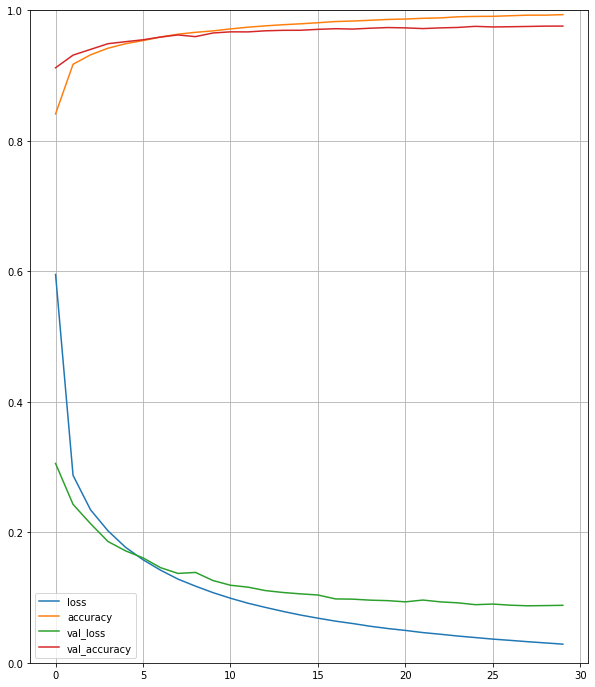

In [150]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 12))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [152]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0767 - accuracy: 0.9768

Accuracy: 0.9768000245094299


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)